## 6절. KNN

- 지도학습
- 어떤 범주로 나누어져 있는 데이터셋이 있을 때, 새로운 데이터가 추가된다면 <br>이를 어떤 범주로 분류할 것인지를 결정하는 알고리즘
- 최근접 이웃 간의 거리를 계산할 때, 유클리디안, 멘하탄, 민코우스키 거리 등을 사용
- k의 선택은 일반적으로 **훈련데이터 개수의 제곱근**으로 설정

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
credit = pd.read_csv('data/credit_final.csv')
credit.head(3)

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1


In [13]:
credit.shape

(1000, 21)

- 데이터 분할

In [3]:
X = credit.drop(['credit.rating'],axis = 1)
Y = credit['credit.rating']

train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 20, test_size=0.3)

- 모델 적합

In [4]:
clf = neighbors.KNeighborsClassifier(5)
clf.fit(train_x,train_y)

KNeighborsClassifier()

In [5]:
y_pred = clf.predict(test_x)

In [6]:
confusion_matrix(test_y,y_pred)

array([[ 16,  61],
       [ 36, 187]], dtype=int64)

In [7]:
accuracy_score(y_pred, test_y)

0.6766666666666666

In [8]:
roc_auc_score(y_pred, test_y)

0.530862282878412

In [9]:
# 교재에서는 최적의 k가 20이라네..?

accuracy = []
auc = []
for i in range(2,20):
    clf = neighbors.KNeighborsClassifier(i)
    clf.fit(train_x,train_y)
    y_pred = clf.predict(test_x)
    cfm = confusion_matrix(y_pred,test_y)
    accuracy.append(accuracy_score(y_pred, test_y))
    auc.append(roc_auc_score(y_pred, test_y))

In [27]:
print("acc 기준 최적의 k값 : {}, accuracy : {}".format(2+accuracy.index(max(accuracy)),max(accuracy)))
print("auc 기준 최적의 k값 : {}, accuracy : {}".format(2+auc.index(max(auc)),max(auc)))

acc 기준 최적의 k값 : 11, accuracy : 0.75
auc 기준 최적의 k값 : 11, accuracy : 0.6537037037037037


In [11]:
accuracy

[0.5233333333333333,
 0.6366666666666667,
 0.5866666666666667,
 0.6766666666666666,
 0.6266666666666667,
 0.7166666666666667,
 0.67,
 0.73,
 0.6833333333333333,
 0.75,
 0.6866666666666666,
 0.74,
 0.7033333333333334,
 0.7433333333333333,
 0.73,
 0.74,
 0.71,
 0.7333333333333333]

## Cross-validation

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
k_range = range(1,100)
k_scores= []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, train_x,train_y, cv=10, scoring="accuracy")
    k_scores.append(scores.mean())

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

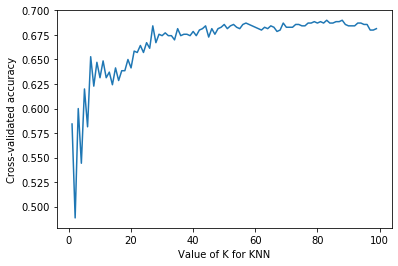

In [15]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

In [28]:
k_scores[9]

0.6314285714285713

In [29]:
max(k_scores)

0.6900000000000001